# 7.4 案例分析报告 ——研究巧克力销量的影响因素分析

## 1 背景介绍

背景介绍部分可以从以下几个方面展开：

【商品图片】可以从在搜索引擎上搜索商品，然后下载图片。当然考虑版权问题，可以从网上下载开源图片。开源图片网站有：
1. unsplash: <https://unsplash.com/>
2. pexels: <https://www.pexels.com/zh-cn/>
 

【行业、市场现状、产量、产值、人均消费量等，以及数据来源】

【商品的特点】

【商品的品牌、即市场参与者】

【商品所在行业的发展趋势、存在的问题】（非必需）

范例如下：

<center><img src="image/jessica-loaiza-DHYfjAe_eeo-unsplash.jpg" alt="image/jessica-loaiza-DHYfjAe_eeo-unsplash.jpg" width="400" height="228"></center>
<center>图片来源:Jessica Loaiza@unsplash.com</center>



巧克力是以可可制品(包括可可脂、可可粉或可可浆)和糖为主要原材料制成的一种甜食，口感细腻甜美，并伴随一股浓郁的香气，是休闲零食的一大品类。

2010年以来，全球巧克力产品销售规模稳步增长，Statista数据显示，2019年全球巧克力产品销售规模达1186.2亿美元，同比2018年增长4.4%，预计2020年全年销售额可达1237.0亿美元，到2023年全球销售额将超过1350亿美元。按照消费量计，2019年全球巧克力产品消费量达1042.4万吨，同比2018年增长1.8%，预计2020年全年消费量可达1060.1万吨，到2023年全球消费量将超过1100万吨。

按照产品中使用代可可脂及是否添加辅料，可将巧克力产品进一步细分。常见的纯巧克力有黑巧克力、白巧克力、牛奶巧克力等，巧克力制品则有果仁巧克力、夹心巧克力、威化巧克力、酒心巧克力等。

目前国内巧克力的品牌主要有：德芙、费列罗、好时、Meiji、歌帝梵等，这些品牌的主要销售渠道为超市、电商平台等。

## 2 研究的问题

本文主要研究JD电商平台上影响巧克力销量的因素有哪些，以及这些因素和销量之间的数量关系。  
所考虑的因素如下：

|变量类型|变量名|详细说明|单位|
|---|---|---|---|
|因变量Y|巧克力的销量|JD平台的巧克力的销量，这里使用评价数量作为代理|评价数|
|自变量X1|价格|每500g巧克力的价格|元|
|自变量X2|巧克力的品牌|德芙、好时等，|虚拟变量0，1|
|自变量X3|巧克力的口味|黑巧克力、牛奶巧克力等|虚拟变量0，1|



## 3 数据读取与处理

### 3.1 数据采集

本文通过应用数据采集软件（八爪鱼），从JD平台上采集和巧克力相关的数据。

采集方法如下：
1. 搜索JD平台，使用关键词“巧克力”，获取到链接地址
2. 应用八爪鱼上智能爬取功能，采集第1步的链接地址
3. 采集样本数为400+个样本，并保存为xlsx格式
4. 转换xlsx格式文件为csv格式文件

### 3.2 数据读取

我们使用pandas库来读取相关的数据集文件：巧克力数据集.CSV

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('datasets/巧克力小数据集.csv')
data.head(1)

,价格,价格1,名称_链接,名称,skcolor_ljg,promowords,pcommit,店铺_链接,店铺,关键词
0,56.9,56.9,https://item.jd.com/2020621.html,士力架花生夹心巧克力1000g量贩装 王嘉尔代言 礼物礼品横扫饥饿(新旧包装随机发放）,巧克力,NaN,NaN,https://mall.jd.com/index-1000078502.html?from=pc,德芙京东自营旗舰店,自营


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data2 = data[['价格', '名称']]
data2['评价数'] = data['pcommit']
data2

,价格,名称,评价数
0,56.9,士力架花生夹心巧克力1000g量贩装 王嘉尔代言 礼物礼品横扫饥饿(新旧包装随机发放）,NaN
1,30.9,德芙Dove丝滑牛奶巧克力分享碗装 252g 代言人同款 休闲零食婚庆糖果礼品（新旧包装随机发放）,NaN
2,30.9,德芙Dove香浓黑巧克力分享碗装 252g 代言人同款办可可脂公室零食婚庆喜糖(新旧包装随机发放),NaN
3,139.9,费列罗(FERRERO)榛果威化糖果巧克力制品 婚庆喜糖零食伴手礼 节日礼物员工福利 48粒...,NaN
4,30.9,德芙什锦碗装三种口味混合 249g 代言人同款 休闲零食礼物礼品（新旧包装随机发放）,NaN
...,...,...,...
397,25.8,德国进口 RitterSport 瑞特滋（原瑞特斯波德）加纳系列81%特浓黑巧克力 休闲零食...,10万+条评价
398,39.9,好时（Hershey's） 巧克力排块30g*9条270g盒装 曲奇奶香好时脆乐多30g*9条,1000+条评价
399,12.5,Solove100%纯黑巧克力纯脂礼盒装极苦送女友零食纯可可脂120g 72%可可-苦中略甜...,500+条评价
400,79.9,好时之吻 Kisses 曲奇奶香好时脆乐多 休闲零食 糖果巧克力 结婚糖果 婚庆喜糖 散装 ...,50万+条评价


### 3.3 标题提取信息

下面准备从名称这一列提取信息，提取方法如下：

In [5]:
# 将以下代码封装成函数
def func(data, key_word):
    result = []
    for i in data['名称']:
        if key_word in i:
            result.append(1)
        else:
            result.append(0)
    return result

In [6]:
data3 = data2[['价格', '评价数']]

In [7]:
data3['德芙'] = func(data2, '德芙')
data3['好时'] = func(data2, '好时')
data3['费列罗'] = func(data2, '费列罗')
data3['Meiji'] = func(data2, 'Meiji')
data3['歌帝梵'] = func(data2, '歌帝梵')
data3['牛奶巧克力'] = func(data2, '牛奶巧克力')
data3['夹心巧克力'] = func(data2, '夹心巧克力')
data3['黑巧克力'] = func(data2, '黑巧克力')
data3['榛果'] = func(data2, '榛果')

In [8]:
data3

,价格,评价数,德芙,好时,费列罗,Meiji,歌帝梵,牛奶巧克力,夹心巧克力,黑巧克力,榛果
0,56.9,NaN,0,0,0,0,0,0,1,0,0
1,30.9,NaN,1,0,0,0,0,1,0,0,0
2,30.9,NaN,1,0,0,0,0,0,0,1,0
3,139.9,NaN,0,0,1,0,0,0,0,0,1
4,30.9,NaN,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
397,25.8,10万+条评价,0,0,0,0,0,0,0,1,0
398,39.9,1000+条评价,0,1,0,0,0,0,0,0,0
399,12.5,500+条评价,0,0,0,0,0,0,0,1,0
400,79.9,50万+条评价,0,1,0,0,0,0,0,0,0


### 3.4 评价数处理

In [16]:
import numpy as np
result = []
for i in data3['评价数']:
    if type(i)==str:
        s = i.replace('评价', '').replace('+', '').replace('条','').replace('万','0000')
        s = float(s)
    result.append(s)

In [17]:
len(result)

402

In [19]:
data3['评价数'] = result
data3

,价格,评价数,德芙,好时,费列罗,Meiji,歌帝梵,牛奶巧克力,夹心巧克力,黑巧克力,榛果
0,56.9,1000.0,0,0,0,0,0,0,1,0,0
1,30.9,1000.0,1,0,0,0,0,1,0,0,0
2,30.9,1000.0,1,0,0,0,0,0,0,1,0
3,139.9,1000.0,0,0,1,0,0,0,0,0,1
4,30.9,1000.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
397,25.8,100000.0,0,0,0,0,0,0,0,1,0
398,39.9,1000.0,0,1,0,0,0,0,0,0,0
399,12.5,500.0,0,0,0,0,0,0,0,1,0
400,79.9,500000.0,0,1,0,0,0,0,0,0,0


### 3.5 价格处理

因为价格中有存在着暂无报价，所以将其过滤并赋值为NaN。

In [20]:
result = []
for i in data3['价格']:
    if i != '暂无报价':
        result.append(float(i))
    else:
        result.append(np.nan)

In [21]:
data3['价格'] = result

### 3.6 删除缺失值

观察发现，data3的评价数这一列有很多NaN这种缺失值，我们将其删除掉，也就是如果一行有缺失值，就将这一行全部删除。

In [22]:
data3=data3.dropna()
data3

,价格,评价数,德芙,好时,费列罗,Meiji,歌帝梵,牛奶巧克力,夹心巧克力,黑巧克力,榛果
0,56.9,1000.0,0,0,0,0,0,0,1,0,0
1,30.9,1000.0,1,0,0,0,0,1,0,0,0
2,30.9,1000.0,1,0,0,0,0,0,0,1,0
3,139.9,1000.0,0,0,1,0,0,0,0,0,1
4,30.9,1000.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
397,25.8,100000.0,0,0,0,0,0,0,0,1,0
398,39.9,1000.0,0,1,0,0,0,0,0,0,0
399,12.5,500.0,0,0,0,0,0,0,0,1,0
400,79.9,500000.0,0,1,0,0,0,0,0,0,0


In [23]:
data3.to_csv('Chocolate.csv', index=False)

## 4 描述性统计

下面我们使用描述性统计的方法生成结果，

In [24]:
cleaned_data = data3
cleaned_data.describe()

,价格,评价数,德芙,好时,费列罗,Meiji,歌帝梵,牛奶巧克力,夹心巧克力,黑巧克力,榛果
count,402.000000,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,75.127512,3.188017e+05,0.191542,0.034826,0.134328,0.022388,0.057214,0.159204,0.104478,0.288557,0.106965
std,70.326180,7.385923e+05,0.394005,0.183567,0.341430,0.148126,0.232540,0.366322,0.306260,0.453656,0.309454
min,5.900000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.500000,6.250000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.250000,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,99.000000,5.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,409.000000,5.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


我们观察到，价格的最小值和最大值分别是5.9元和409元，价格区间跨度较大。巧克力价格的平均值为75元，标准差为70元，价格的的差异较大。

评论数的最小值和最大值分别为0和50万份，平均值在3.63万份，标准差为9.53万份。

### 4.2 价格的分布（单一变量）

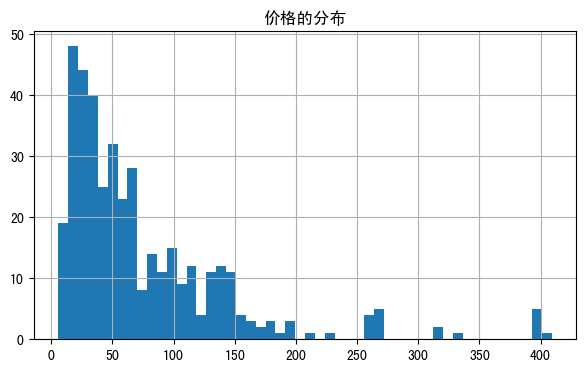

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

Z = cleaned_data['价格']
fig, ax = plt.subplots(figsize=(7,4))      
ax.hist(Z, bins=50)               
ax.set_title('价格的分布')
ax.grid()
plt.show()

通过观察上述价格分布，样布的价格大部分落在了0到150元这个区间里，有极少部分的样布大于150元。

接下来，我们使用箱型图进一步了解价格的分布。

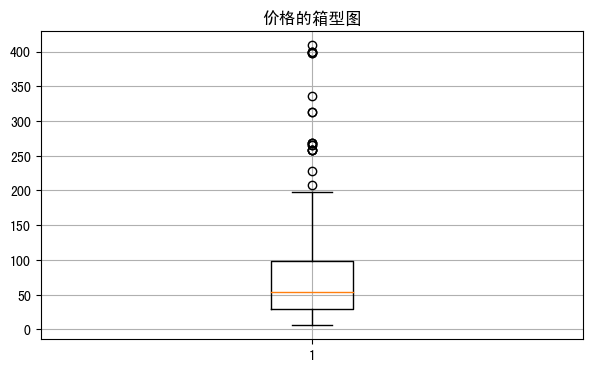

In [27]:
Z = cleaned_data['价格']
fig, ax = plt.subplots(figsize=(7,4))
ax.boxplot(Z)
ax.set_title('价格的箱型图')
ax.grid()
plt.show()

通过绘制箱型图，我们可以清晰地看到75%的数据在100元以下，绝大多数的数据在200元以内，极少的样本价格在200元以上。

### 4.3 品牌的占比（单一变量）

以下通过绘制饼状图，来观察德芙、好时和费列罗等品牌的市场占有率。

In [28]:
labels = [ '德芙', '好时', '费列罗', 'Meiji', '歌帝梵']
X = cleaned_data[labels].sum()
autopct='%1.1f%%'
explode = (0.1, 0, 0, 0, 0)

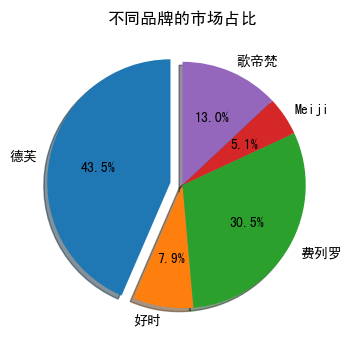

In [29]:
fig, ax = plt.subplots(figsize=(7,4))
ax.pie(X, labels=labels,
          autopct=autopct,
          explode=explode,
          shadow=True,
          startangle=90)             
ax.set_title('不同品牌的市场占比')
plt.show()

通过观察，我们可以知道德芙市场占有率最高，占比超过XX%，其次是费列罗，市场占有率为XX%，
最少的为好时巧克力，市场占有率为X%。

产生以上的原因，可能是：
1. 德芙的市场营销做的比较好
2. 德芙的巧克力收到消费者的偏好（价格、口味、品牌等）
3. 经济学原理里的非完全竞争市场造成的，这种市场出现寡头、垄断等现象，部分品牌较高的市场占有率较高，具有市场支配地位  
以上的猜测有待进一步分析和证实

In [30]:
labels = ['牛奶巧克力', '夹心巧克力', '黑巧克力', '榛果']
X = cleaned_data[labels].sum()
autopct='%1.1f%%'
explode = (0, 0, 0.1, 0)

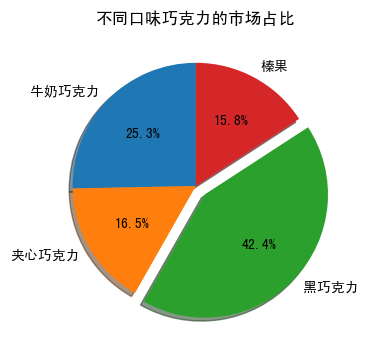

In [22]:
fig, ax = plt.subplots(figsize=(7,4))
ax.pie(X, labels=labels,
          autopct=autopct,
          explode=explode,
          shadow=True,
          startangle=90)             
ax.set_title('不同口味巧克力的市场占比')
plt.show()

通过观察，我们可以知道黑巧克力口味占有率最高，占比超过XX%，其次是牛奶巧克力，
市场占有率为XX%， 其次是榛果口味的巧克力，市场占有率为XX%， 最少的为杏仁巧克力，市场占有率为X%。

我们猜测有以下原因：
1. 消费者的口味是不同的，三种口味的喜好的人群数量接近
2. 在电商平台上，市场具有高度的自由选择权，不存在渠道，或者商家强制销售或支配消费者的情况，消费者具有很强的自主权
3. 地区原因，国内消费者的特殊偏好

以上的猜想需要进一步分析和证实

### 4.4 价格和销售量的关系（两个变量）

我们希望通过绘制散点图来观察价格和销量之间的关系。

In [23]:
X = cleaned_data['价格']
Y= cleaned_data['评价数']

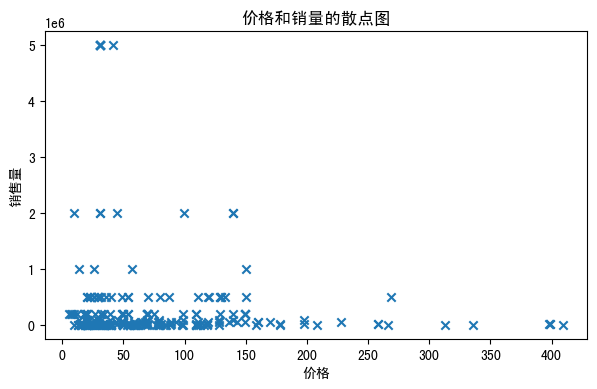

In [24]:
fig, ax = plt.subplots(figsize=(7,4))  
ax.scatter(X, Y, marker='x')               # 散点图的语句
ax.set_xlabel('价格')
ax.set_ylabel('销售量')
ax.set_title('价格和销量的散点图')
plt.show()

观察上图，可以得知销量最高的价格在40元到50元，销售量较高的商品价格分布较大，在0到150元左右。

定价在200元以上的巧克力销量普遍较低，在10万份以下。

结合电商平台不披露商品销量、但是披露消费者对于商品的评价数这个原因，我们容易理解为什么散点图里，散点呈阶梯式分布。

从消费者的角度，观察上图，价格分布在100元左右及以下的商品，呈现一个特点：价格越低，销量越好。
销量最高可以达到5百万。但是价格继续下跌，销量反而下降了，产生这个的原因可能有：
1. 价格低的品牌或口味不受欢迎
2. 消费者担心质量问题  
3. 消费者群体对于价格区间的认同，30-40元；并且存在跟随、羊群效应  
以上的猜想有待进一步证实。

我们还能够观察到，在50元左右样本数较多，但是销量普遍不高，产生的原因可能有：商家在这一价格区间上竞争很激烈，但是总的市场份额又有限，造成每一个商家销量反而不高。

当价格超过50元，消费量呈现一直下跌的趋势，当价格接近400元，销量下滑到接近0。这种下滑的原因可能有：
1. 符合经济学规律，价格越高，销量越低，价格越高会抑制消费意愿
2. 较高价格的商品本身并不受消费喜欢（口味、包装等），受众不高。

以上的猜想有待进一步证实

## 5 数据集的划分 

根据随机对照试验的理论，我们通常将数据集划分为训练集（training sets）和测试集（test sets），前者负责模型的训练任务，后者用来评价模型的表现。两者的划分比例按照经验，设置为0.8:0.2。

In [25]:
cleaned_data.head(5)

,价格,评价数,德芙,好时,费列罗,Meiji,歌帝梵,牛奶巧克力,夹心巧克力,黑巧克力,榛果
30,56.9,1000000.0,0,0,0,0,0,0,1,0,0
31,30.9,5000000.0,1,0,0,0,0,1,0,0,0
32,30.9,5000000.0,1,0,0,0,0,0,0,1,0
33,139.9,2000000.0,0,0,1,0,0,0,0,0,1
34,30.9,5000000.0,1,0,0,0,0,0,0,0,0


In [26]:
cleaned_data.columns

Index(['价格', '评价数', '德芙', '好时', '费列罗', 'Meiji', '歌帝梵', '牛奶巧克力', '夹心巧克力',
       '黑巧克力', '榛果'],
      dtype='object')

In [27]:
x = cleaned_data[['价格', '德芙', '好时', '费列罗', 'Meiji', '歌帝梵', '牛奶巧克力', '夹心巧克力',
       '黑巧克力', '榛果']]
y = cleaned_data['评价数']

一般将80%的原始数据集的子样本集作为样本内(In-sample, IS)，剩余20%作为样本外(Out-of-sample, OOS)。样本总数为500个，一种简单的切割方法是直接指定前80%个样本为IS，后面20%为OOS，但是这种采样方法存在弊端。

![fix_split](image/fix_split.png)

当我们并不了解原始数据集是不是被刻意排列了，最好的办法是使用随机抽样，即随机抽80%为IS，剩余的20%为OOS。我们使用生成随机数的方法，生成随机序列，来从总体样本中随机抽取样本：

![random_split](image/random_split.png)

In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = \
        train_test_split(x, y,train_size=0.8,random_state=42)

## 6 多元回归分析模型

### 6.1 各个变量之间的相关系数

首先，我们计算单个自变量和因变量之间的相关系数，使用pearson相关系数来计算。

In [29]:
import scipy.stats as stats

In [30]:
r = stats.pearsonr(train_x['价格'], train_y)
print('pearson r:', r[0])

pearson r: -0.1321179802803698


接着，我们使用相关系数矩阵来刻画多个变量之间的关系。

In [31]:
train_df = train_x.copy()
train_df['评价数'] = train_y

<AxesSubplot:>

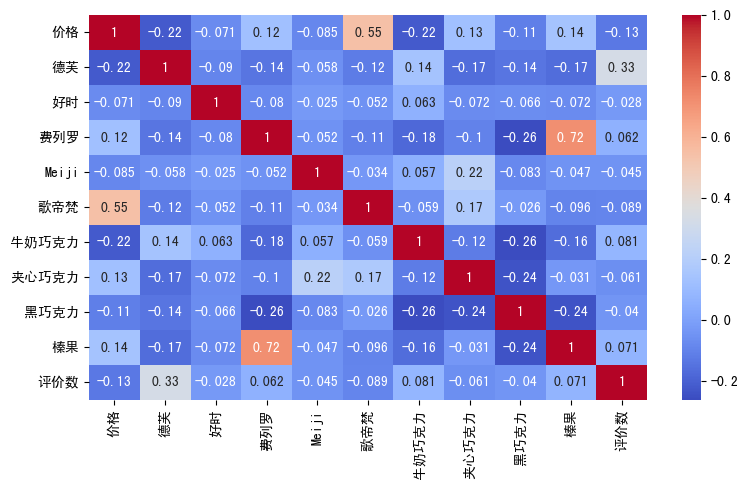

In [32]:
plt.figure(figsize=(9,5))
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
sns.heatmap(train_df.corr(),
           annot=True,
           cmap='coolwarm')

观察以上相关性的热力图，我们可以得出一些初步的结论：
1. 费列罗和榛果的相关性很高，数值为XXX
2. Meiji品牌和杏仁相关性很高，说明该品牌热衷于出品该口味的巧克力
3. 歌帝梵和价格相关性很高，说明相较其他品牌，其价格普遍偏高
4. 德芙和进口相关性为负，说明该品牌很有可能已经国产。

In [33]:
import statsmodels.api as sm
cleaned_data['Intercept'] = 1.
x = cleaned_data[['Intercept','德芙', '好时', '费列罗', 'Meiji', '歌帝梵', '牛奶巧克力', '夹心巧克力',
       '黑巧克力', '榛果']]
y = cleaned_data['评价数']
x = x.astype(float)
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 233 entries, 30 to 401
Series name: 评价数
Non-Null Count  Dtype  
--------------  -----  
233 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [34]:
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    评价数   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.470
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           0.000496
Time:                        21:07:09   Log-Likelihood:                -3522.6
No. Observations:                 233   AIC:                             7065.
Df Residuals:                     223   BIC:                             7100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.263e+05   1.24e+05      1.018      0.310   -1.18e+05    3.71e+05
德芙          8.237e+05   1.64e+05      5.036      0.000    5.01e+05    1.15e+06
好时          8.436e+04   3.03e+05      0.279      0.781   -5.12e+05    6.81e+05
费列罗         1.395e+05   2.66e+05      0.525      0.600   -3.84e+05    6.63e+05
Meiji      -2.057e+05   4.26e+05     -0.483      0.629   -1.04e+06    6.33e+05
歌帝梵        -1.504e+05   2.68e+05     -0.561      0.576   -6.79e+05    3.78e+05
牛奶巧克力       7.716e+04   1.76e+05      0.439      0.661   -2.69e+05    4.23e+05
夹心巧克力       9.186e+04   2.11e+05      0.435      0.664   -3.24e+05    5.08e+05
黑巧克力        3.505e+04   1.55e+05      0.226      0.822   -2.71e+05    3.41e+05
榛果          3.211e+05   2.81e+05      1.142      0.255   -2.33e+05    8.75e+05
==============================================================================
Omnibus:                      180.918   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1728.564
Skew:                           3.162   Prob(JB):                         0.00
Kurtosis:                      14.750   Cond. No.                         7.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6.2 样本内训练模型

在样本内训练模型过程中，我们只能使用train_x和train_y。

首先，初始化线性回归模型。

In [35]:
from sklearn import linear_model
model = linear_model.LinearRegression()

其次，训练模型

In [36]:
model.fit(train_x, train_y)

LinearRegression()

然后，生成预测结果

In [37]:
IS_predicted_y = model.predict(train_x)

接着，计算模型预测精度

In [38]:
IS_precision = model.score(train_x, train_y)

最后，生成汇总信息(summary)

In [39]:
print('截距', model.intercept_)
print("样本内(IS)训练集精度:%.2f" %IS_precision)

截距 78451.01695632783
样本内(IS)训练集精度:0.14


In [40]:
coef = ['%i*%s' %(model.coef_[i], train_x.columns[i])\
                     for i in range(len(model.coef_))]
coef

['-833*价格',
 '869585*德芙',
 '89594*好时',
 '204314*费列罗',
 '-210652*Meiji',
 '23402*歌帝梵',
 '196495*牛奶巧克力',
 '153875*夹心巧克力',
 '168252*黑巧克力',
 '342859*榛果']

In [41]:
'%i' %model.intercept_ + '+'.join(coef)

'78451-833*价格+869585*德芙+89594*好时+204314*费列罗+-210652*Meiji+23402*歌帝梵+196495*牛奶巧克力+153875*夹心巧克力+168252*黑巧克力+342859*榛果'

模型的回归方程：

$$
销量 = 78451-833*价格+869585*德芙+168252*黑巧克力+\dots
$$

根据方程可以得出以下结论，在保持其他自变量不变的情况下：
1. 价格每增加1元，销量减少833个单位
2. 如果品牌是德芙，销量将带来86万个单位的增加
3. 如果巧克力是黑巧克力，销量将带来16.8万个单位的增加
4. xxxxx

我们将样本内IS的y和预测出的y绘制到一张图片上

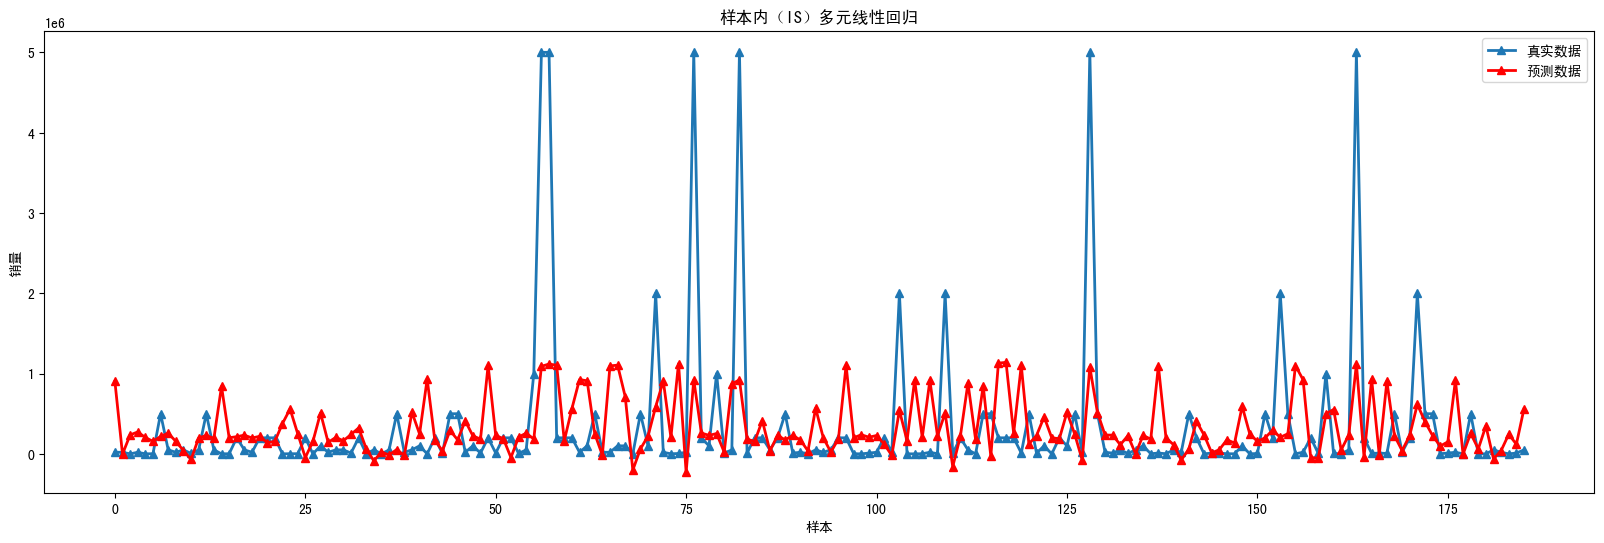

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(range(len(train_y)), train_y, label='真实数据', linewidth=2, marker='^')
ax.plot(range(len(train_y)), IS_predicted_y, label='预测数据', linewidth=2, color="red",marker='^')
ax.set_xlabel('样本')
ax.set_ylabel('销量')
ax.set_title('样本内（IS）多元线性回归')
ax.legend()
plt.show()

### 6.3 样本外表现

我们再来看看我们刚才训练的模型，在样本外的表现。

In [43]:
OOS_predicted_y = model.predict(test_x)

再次，计算模型预测精度

In [44]:
OOS_precision = model.score(test_x, test_y)

最后，生成汇总信息（summary）

In [45]:
print("样本外（OOS）测试集预测精度:%.2f" %OOS_precision)

样本外（OOS）测试集预测精度:0.05


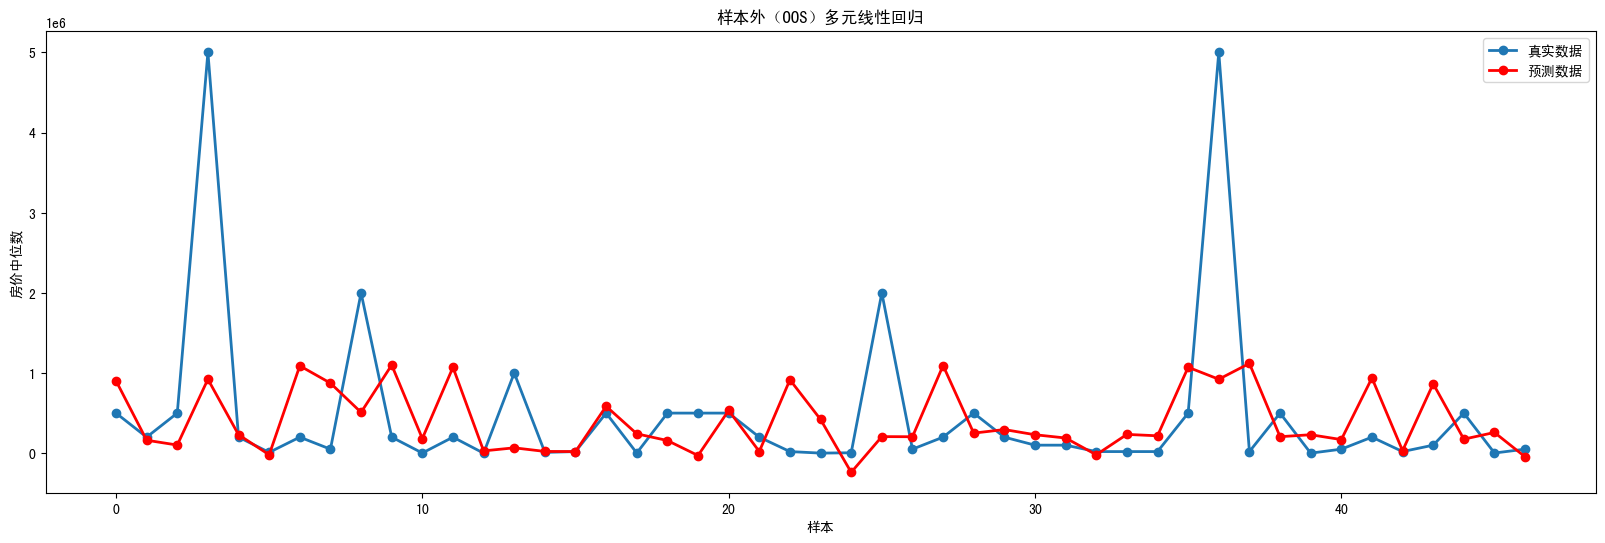

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(range(len(test_y)), test_y, 'o-', label='真实数据', linewidth=2)
ax.plot(range(len(test_y)), OOS_predicted_y, 'o-', label='预测数据', linewidth=2, color="red")
ax.set_xlabel('样本')
ax.set_ylabel('房价中位数')
ax.set_title('样本外（OOS）多元线性回归')
ax.legend()
plt.show()

In [47]:
print("样本内(IS)训练集精度:%.2f" %IS_precision)
print("样本外（OOS）测试集预测精度:%.2f" %OOS_precision)

样本内(IS)训练集精度:0.14
样本外（OOS）测试集预测精度:0.05


根据上述的回归分析结果，样本内和样本外的预测精度较为良好。

## 7 结论与建议

### 7.1 结论

本报告基于京东平台的真实数据，采集了XXX个样本，分析和研究了巧克力销量的影响因素。

价格的最小值和最大值分别是5.9元和409元，价格区间跨度较大。巧克力价格的平均值为75元，标准差为70元，价格的的差异较大。
评论数的最小值和最大值分别为0和50万份，平均值在3.63万份，标准差为9.53万份。通过分析，可以得知销量最高的价格在40元到50元，销售量较高的商品价格分布较大，在0到150元左右。
定价在200元以上的巧克力销量普遍较低，在10万份以下。

通过分析，我们可以知道黑巧克力口味占有率最高，占比超过XX%，其次是牛奶巧克力， 市场占有率为XX%， 其次是榛果口味的巧克力，市场占有率为XX%， 最少的为杏仁巧克力，市场占有率为X%。通过观察，我们可以知道德芙市场占有率最高，占比超过XX%，其次是费列罗，市场占有率为XX%， 最少的为好时巧克力，市场占有率为X%。



观察以上相关性的热力图，我们可以得出一些初步的结论：

1. 费列罗和榛果的相关性很高，数值为XXX
2. Meiji品牌和杏仁相关性很高，说明该品牌热衷于出品该口味的巧克力
3. 歌帝梵和价格相关性很高，说明相较其他品牌，其价格普遍偏高
4. 德芙和进口相关性为负，说明该品牌很有可能已经国产。

根据回归方程可以得出以下结论，在保持其他自变量不变的情况下：

1. 价格每增加1元，销量减少833个单位
2. 如果品牌是德芙，销量将带来86万个单位的增加
3. 如果巧克力是黑巧克力，销量将带来16.8万个单位的增加
4. xxxxx

通过观察，我们可以知道德芙市场占有率最高，占比超过XX%，其次是费列罗，市场占有率为XX%，
最少的为好时巧克力，市场占有率为X%。

### 7.2 不足

以上模型在样本内(IS)训练集精度:0.14，样本外（OOS）测试集预测精度:0.05。说明整体预测精度有限，
我们可以通过一下方式改进：
1. 增大样本数量
2. 增加更多能预测巧克力销量的信息，例如商家的营销能力、消费者的偏好等等。

### 7.3 建议

对商家的建议：
1. 多销售一些德芙品牌巧克力，带来更多的销量，从而带来额外的利润
2. 多销售黑巧克力口味的巧克力，带来更多的销量，从而带来额外的利润
3. 找到价格和销量的平衡点，指定合理的价格，例如降低价格，提高销量，使得利润最大化。